# Q-Learning Demo with GridDockEnv

This notebook demonstrates training a Q-learning agent 
in our customizable GridDock environment, using utility 
functions for training and visualization.


In [1]:
# 1) ensure Python can see your project root
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt


# if this notebook lives in project_root/notebooks,
# one '..' gets you back to project_root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("→ Added to sys.path:", project_root)
print("→ cwd is:", os.getcwd())

from utils.grid_utils import *
from environments.grid_env  import GridDockEnv
from agents.q_learning_agent import QLearningAgent
from agents.dqn_agent import DQNAgent


→ Added to sys.path: /Users/eirikvarnes/code/auv-rl-project
→ cwd is: /Users/eirikvarnes/code/auv-rl-project/notebooks


In [23]:
# Initialize environment and agent
grid_size = (5, 5)
spawn_mode = 'random'  # or 'static'
env = GridDockEnv(grid_size=grid_size, spawn_mode=spawn_mode)
q_agent = QLearningAgent(env)


In [24]:
# Train agent
episodes = 10000
max_steps = 100
rewards, eps_history = train_agent(env, agent, episodes, max_steps)


AttributeError: 'DQNAgent' object has no attribute 'update'

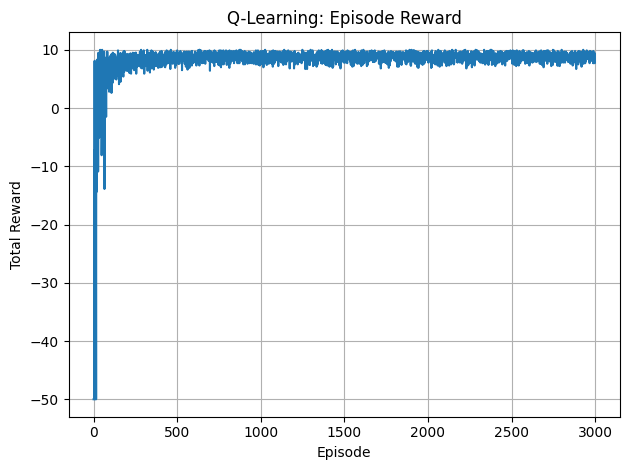

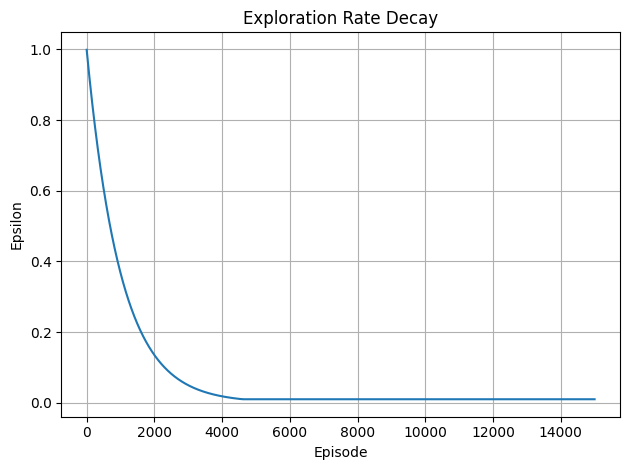

In [25]:
# Plot results
plot_rewards(rewards)
plot_epsilon(eps_history)

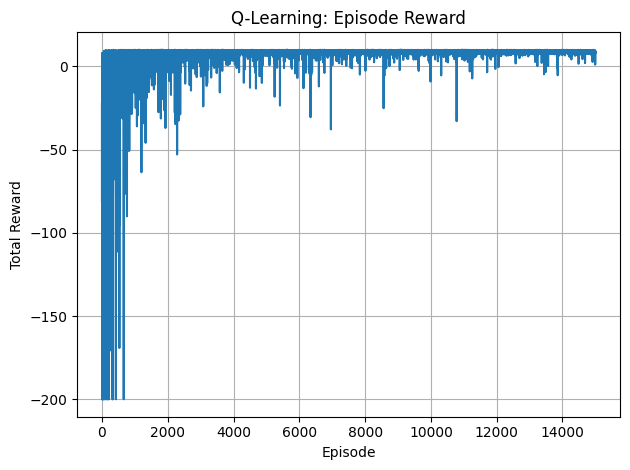

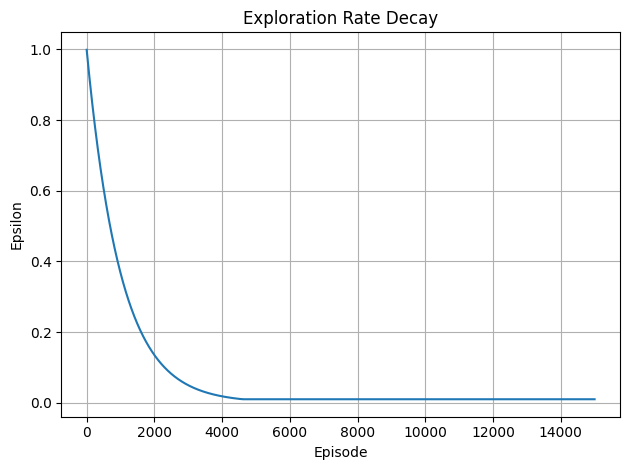

In [26]:
# ─ Configure env & agent ─────────────────────────
env = GridDockEnv(grid_size=(20,20), spawn_mode='random')
q_agent = QLearningAgent(env,
                       alpha=0.2,
                       gamma=0.9,
                       epsilon=1.0,
                       epsilon_min=0.01,
                       epsilon_decay=0.999)

# ─ Train ──────────────────────────────────────────
rewards, eps_history = train_agent(env, q_agent,
                                   episodes=15000,
                                   max_steps=2000)
plot_rewards(rewards)
plot_epsilon(eps_history)
q_agent.save("../models/q_table.npy")

# ─ Animate ────────────────────────────────────────
animate_agent_matplotlib(env, q_agent, max_steps=2000, delay=0.1, figsize=(6,6))

In [ ]:
from utils.grid_utils import evaluate_agent

env = GridDockEnv(grid_size=(20,20), spawn_mode='random')


success_rate, avg_steps = evaluate_agent(env, q_agent,
                                         episodes=20000,
                                         max_steps=200)
print(f"Success rate: {success_rate*100:.1f}%")
print(f"Avg steps when successful: {avg_steps:.1f}")


IndexError: index 39 is out of bounds for axis 1 with size 39

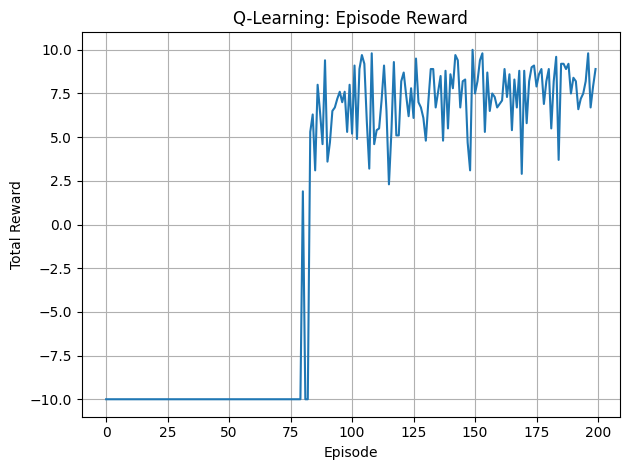

Training complete! DQN‐network saved.


In [36]:
# ─── Training Cell ─────────────────────────────────
from utils.grid_utils import train_dqn, plot_rewards
from agents.dqn_agent   import DQNAgent
from environments.grid_env import GridDockEnv

env   = GridDockEnv(grid_size=(20,20), spawn_mode='random')
dqn_agent = DQNAgent(env,
                 hidden_dims=[128,128],
                 lr=1e-3,
                 gamma=0.95,
                 epsilon_decay=0.995,
                 batch_size=64,
                 buffer_size=5000,
                 target_update=20)

rewards = train_dqn(env, dqn_agent, episodes=200, max_steps=100)
plot_rewards(rewards)

# Save your network weights
dqn_agent.save("../models/dqn_griddock.pth")
print("Training complete! DQN‐network saved.") 

In [37]:
# ─── Evaluation & Animation ──────────────────────────────────────────
# 1) Fresh env & agent
env   = GridDockEnv(grid_size=(20,20), spawn_mode='random')
dqn_agent = DQNAgent(env)

# 2) Load your trained weights
dqn_agent = DQNAgent.load_from_checkpoint(env = env, path =  "../models/dqn_griddock.pth", cls = DQNAgent)

# 3) Quick quantitative check**
success_rate, avg_steps = evaluate_agent(env, dqn_agent,
                                         episodes=1000,
                                         max_steps=200)

print(f"Success rate: {success_rate*100:.1f}%   Avg steps (when successful): {avg_steps:.1f}")

# 4) Inline HTML5 animation
anim = animate_agent_matplotlib(env, dqn_agent,
                                max_steps=200,
                                delay=0.1,
                                figsize=(6,6))
from IPython.display import display
display(anim)


Success rate: 100.0%   Avg steps (when successful): 13.7
